In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [4]:
df = pd.read_csv('updated_cleaned_data.csv')

In [5]:
df.shape

(15146, 30)

In [6]:
df.head(5)

,Property ID,Zip code,City,Type of Property,Subtype of Property,Price (€),Construction year,Bedrooms,Living area (m²),Kitchen type,...,Elevator,Basement,Primary energy consumption (kWh/m²),CO₂ emission (kg CO₂/m²),Energy class,Heating type,Kitchen type scale,Building condition scale,Region,Price per m²
0,10583186,1341,céroux-mousty,apartment,duplex,415000,2016.0,2.0,139.0,USA hyper equipped,...,1,0,116.0,NaN,B,Gas,3.0,6.0,Walloon,2985.611511
1,10463775,1180,uccle,apartment,penthouse,1650000,2021.0,3.0,235.0,USA hyper equipped,...,1,1,62.0,9.0,B,Gas,3.0,6.0,Brussels capital region,7021.276596
2,10582739,1180,uccle,apartment,flat studio,159000,1977.0,1.0,30.0,Installed,...,1,0,316.0,NaN,F,Electric,2.0,4.0,Brussels capital region,5300.000000
3,10582752,4300,waremme,house,mansion,495000,1918.0,6.0,250.0,Installed,...,0,0,130.0,25.0,B,Gas,2.0,6.0,Walloon,1980.000000
4,10579605,1332,rixensart genval,house,villa,530000,1928.0,4.0,176.0,USA hyper equipped,...,0,1,394.0,69.0,E,Gas,3.0,4.0,Walloon,3011.363636


In [7]:
df.describe()

,Property ID,Zip code,Price (€),Construction year,Bedrooms,Living area (m²),Furnished,How many fireplaces?,Terrace,Terrace surface (m²),...,Surface of the plot (m²),Number of frontages,Swimming pool,Elevator,Basement,Primary energy consumption (kWh/m²),CO₂ emission (kg CO₂/m²),Kitchen type scale,Building condition scale,Price per m²
count,1.514600e+04,15146.000000,1.514600e+04,9869.000000,15146.000000,15146.000000,15146.000000,15146.000000,15146.000000,15146.000000,...,9.278000e+03,11826.000000,15146.000000,15146.000000,15146.000000,12316.000000,3533.000000,10515.000000,11537.000000,15146.000000
mean,1.048171e+07,4730.376997,5.747720e+05,1974.064039,3.455368,216.771623,0.028126,0.071042,0.654628,13.431335,...,2.730509e+03,2.976662,0.048198,0.202232,0.366037,364.700850,964.125389,2.077889,4.371067,2851.903016
std,2.006246e+05,3068.621752,6.294464e+05,41.303004,1.986556,207.577870,0.165339,0.284467,0.475505,33.391814,...,2.994844e+04,0.928913,0.214190,0.401677,0.481736,1685.733557,4797.448186,0.795365,1.351608,1952.818111
min,4.611027e+06,1000.000000,1.900000e+04,1753.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e+00,1.000000,0.000000,0.000000,0.000000,-10.000000,-4.000000,0.000000,1.000000,31.500414
25%,1.047028e+07,1950.000000,2.736112e+05,1956.000000,2.000000,114.000000,0.000000,0.000000,0.000000,0.000000,...,2.600000e+02,2.000000,0.000000,0.000000,0.000000,176.000000,41.000000,2.000000,4.000000,1839.464286
50%,1.056160e+07,3970.000000,3.950000e+05,1978.000000,3.000000,170.000000,0.000000,0.000000,1.000000,0.000000,...,6.590000e+02,3.000000,0.000000,0.000000,0.000000,272.000000,67.000000,2.000000,4.000000,2485.829030
75%,1.057395e+07,8300.000000,6.350000e+05,2007.000000,4.000000,254.000000,0.000000,0.000000,1.000000,16.000000,...,1.447750e+03,4.000000,0.000000,0.000000,1.000000,406.000000,111.000000,3.000000,6.000000,3290.448718
max,1.058496e+07,9992.000000,1.100000e+07,2033.000000,32.000000,11000.000000,1.000000,6.000000,1.000000,1500.000000,...,2.400000e+06,14.000000,1.000000,1.000000,1.000000,85624.000000,88028.000000,3.000000,6.000000,58823.523529


In [8]:
df.groupby('Price (€)').size()

Price (€)
19000       1
20000       2
25000       1
35000       1
39000       1
           ..
8000000     4
8100000     1
8500000     3
9999999     2
11000000    1
Length: 1744, dtype: int64

In [9]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [10]:
#scatter_matrix(df)
#pyplot.show()

In [11]:
array = df.values

In [12]:
#X = array[:,8]
#, 'Swimming pool', 'Bedrooms','Terrace surface (m²)', 'Garden surface (m²)'

In [13]:
# X = df[['Construction year', 'Bedrooms',
#        'Living area (m²)', 'Furnished', 'How many fireplaces?',
#        'Terrace', 'Terrace surface (m²)', 'Garden', 'Garden surface (m²)',
#        'Number of frontages', 'Swimming pool',
#        'Elevator', 'Basement', 
#        'Primary energy consumption (kWh/m²)', 'CO₂ emission (kg CO₂/m²)',
#        'Kitchen type scale',
#        'Building condition scale']].values
X = df[['Construction year', 'Bedrooms',
       'Living area (m²)', 'Furnished', 'How many fireplaces?',
       'Terrace', 'Terrace surface (m²)', 'Garden', 'Garden surface (m²)',
       'Number of frontages', 'Swimming pool',
       'Elevator', 'Basement', 
       'Primary energy consumption (kWh/m²)']].values
#'CO₂ emission (kg CO₂/m²)','Kitchen type scale','Building condition scale',

In [14]:
X

array([[2.016e+03, 2.000e+00, 1.390e+02, ..., 1.000e+00, 0.000e+00,
        1.160e+02],
       [2.021e+03, 3.000e+00, 2.350e+02, ..., 1.000e+00, 1.000e+00,
        6.200e+01],
       [1.977e+03, 1.000e+00, 3.000e+01, ..., 1.000e+00, 0.000e+00,
        3.160e+02],
       ...,
       [      nan, 1.000e+00, 7.800e+01, ..., 0.000e+00, 0.000e+00,
        3.260e+02],
       [      nan, 1.000e+00, 7.000e+01, ..., 1.000e+00, 0.000e+00,
        2.780e+02],
       [1.960e+03, 4.000e+00, 1.700e+02, ..., 0.000e+00, 1.000e+00,
        7.280e+02]])

In [15]:
y = df['Price (€)'].values

In [16]:
y

array([ 415000, 1650000,  159000, ...,  229000,  170000,  329000],
      dtype=int64)

In [17]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [18]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [19]:
# # Загружаем алгоритмы модели
# models = []
# models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))

# # оцениваем модель на каждой итерации
# results = []
# names = []

# for name, model in models:
# 	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
# 	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
# 	results.append(cv_results)
# 	names.append(name)
# 	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [24]:
from sklearn.linear_model import LinearRegression

In [29]:
reg_all = LinearRegression()
reg_all.fit(X_train, Y_train)
y_pred = reg_all.predict(X_validation)


In [30]:
reg_all.score(X_validation, Y_validation)

0.3965166160427025

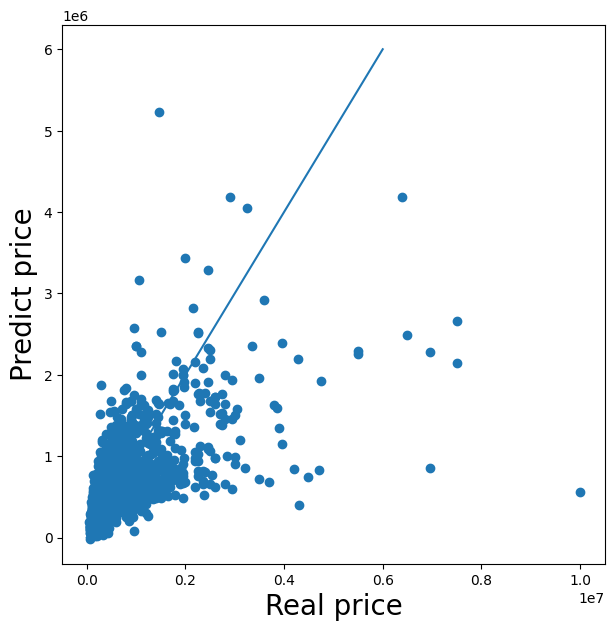

In [31]:
plt.figure(figsize=(7, 7))
plt.scatter(Y_validation, y_pred)
# plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Real price', fontsize=20)
plt.ylabel('Predict price', fontsize=20);


In [32]:
X_train = np.nan_to_num(X_train, nan=0.0)
X_validation = np.nan_to_num(X_validation, nan=0.0)
X_train 


array([[2.024e+03, 3.000e+00, 1.590e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 3.000e+00, 1.450e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 5.000e+00, 4.290e+02, ..., 0.000e+00, 1.000e+00,
        5.410e+02],
       ...,
       [1.980e+03, 3.000e+00, 1.850e+02, ..., 0.000e+00, 0.000e+00,
        2.820e+02],
       [2.012e+03, 2.000e+00, 8.500e+01, ..., 0.000e+00, 1.000e+00,
        2.270e+02],
       [2.007e+03, 2.000e+00, 1.000e+02, ..., 1.000e+00, 1.000e+00,
        2.390e+02]])

In [33]:
X_validation

array([[1.994e+03, 5.000e+00, 5.270e+02, ..., 0.000e+00, 1.000e+00,
        1.990e+02],
       [0.000e+00, 3.000e+00, 1.300e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.010e+03, 3.000e+00, 1.850e+02, ..., 0.000e+00, 0.000e+00,
        1.500e+02],
       ...,
       [0.000e+00, 8.000e+00, 4.000e+02, ..., 0.000e+00, 0.000e+00,
        2.670e+02],
       [1.913e+03, 6.000e+00, 5.400e+02, ..., 0.000e+00, 1.000e+00,
        2.550e+02],
       [1.978e+03, 4.000e+00, 1.560e+02, ..., 0.000e+00, 1.000e+00,
        4.360e+02]])

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, Y_train)
forest.score(X_validation, Y_validation)

#y_pred = reg_all.predict(X_validation)
y_pred = forest.predict(X_validation)

In [35]:
forest.score(X_validation, Y_validation)

0.5360219136348905

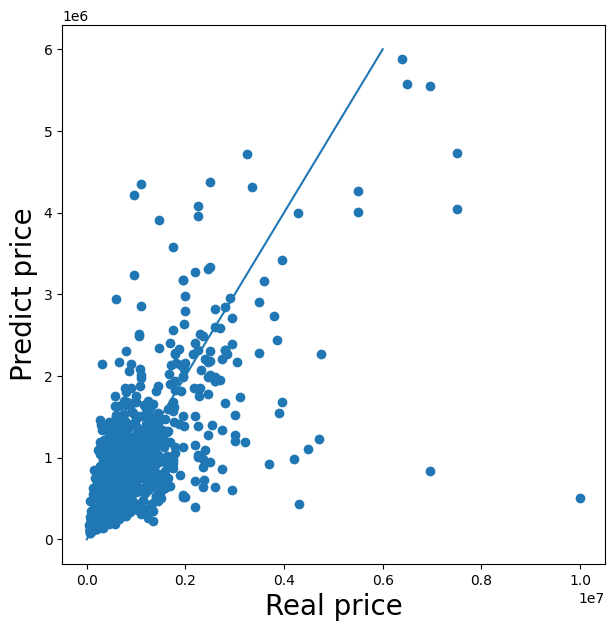

In [36]:

plt.figure(figsize=(7, 7))
plt.scatter(Y_validation, y_pred)
# plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Real price', fontsize=20)
plt.ylabel('Predict price', fontsize=20);